<a href="https://colab.research.google.com/github/devishasolanki/projectneet/blob/main/projectneet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas matplotlib seaborn plotly scikit-learn


In [ ]:
import requests
import pandas as pd
def fetch_current_quiz_data():
    url = "https://jsonkeeper.com/b/LLQT"
    response = requests.get(url)
    return response.json()
def fetch_historical_quiz_data():
    url = "https://api.jsonserve.com/XgAgFJ"
    response = requests.get(url)
    return response.json()
def simulate_data():
    current_quiz_data = {
        "user_id": 1,
        "quiz_id": 101,
        "responses": [
            {"question_id": 1, "topic": "Physics", "difficulty": "Easy", "correct": True},
            {"question_id": 2, "topic": "Chemistry", "difficulty": "Hard", "correct": False},
            {"question_id": 3, "topic": "Biology", "difficulty": "Medium", "correct": True},
        ],
    }
    historical_quiz_data = {
        "user_id": 1,
        "quiz_history": [
            {"quiz_id": 95, "score": 50, "responses": [{"question_id": 1, "correct": True}]},
            {"quiz_id": 96, "score": 60, "responses": [{"question_id": 2, "correct": False}]},
            {"quiz_id": 97, "score": 70, "responses": [{"question_id": 3, "correct": True}]},
        ],
    }
    return current_quiz_data, historical_quiz_data


In [ ]:
def analyze_data(current_quiz, historical_quiz):
    current_df = pd.DataFrame(current_quiz["responses"])
    historical_df = pd.DataFrame(historical_quiz["quiz_history"])
    topic_performance = (
        current_df.groupby("topic")["correct"]
        .mean()
        .reset_index()
        .rename(columns={"correct": "accuracy"})
    )
    historical_trend = historical_df[["quiz_id", "score"]].sort_values(by="quiz_id")
    insights = {
        "topic_performance": topic_performance,
        "historical_trend": historical_trend,
    }
    return insights


In [ ]:
def generate_recommendations(insights):
    topic_performance = insights["topic_performance"]
    recommendations = []
    weak_topics = topic_performance[topic_performance["accuracy"] < 0.7]
    for _, row in weak_topics.iterrows():
        recommendations.append(f"Focus on improving accuracy in {row['topic']}.")
    recommendations.append("Practice medium-difficulty questions for balanced improvement.")
    return recommendations


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_insights(insights):
    plt.figure(figsize=(8, 6))
    sns.barplot(
        data=insights["topic_performance"], x="topic", y="accuracy", palette="viridis"
    )
    plt.title("Topic-Wise Accuracy")
    plt.ylabel("Accuracy")
    plt.xlabel("Topic")
    plt.show()

    plt.figure(figsize=(8, 6))
    sns.lineplot(
        data=insights["historical_trend"], x="quiz_id", y="score", marker="o"
    )
    plt.title("Historical Performance Trend")
    plt.ylabel("Score")
    plt.xlabel("Quiz ID")
    plt.show()


=== Personalized Insights ===
       topic  accuracy
0    Biology       1.0
1  Chemistry       0.0
2    Physics       1.0

=== Recommendations ===
- Focus on improving accuracy in Chemistry.
- Practice medium-difficulty questions for balanced improvement.


<ipython-input-5-4c19320cc0fb>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


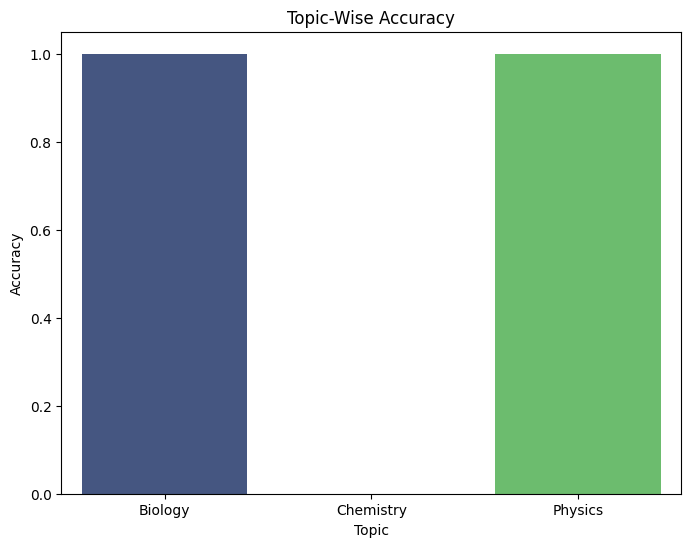

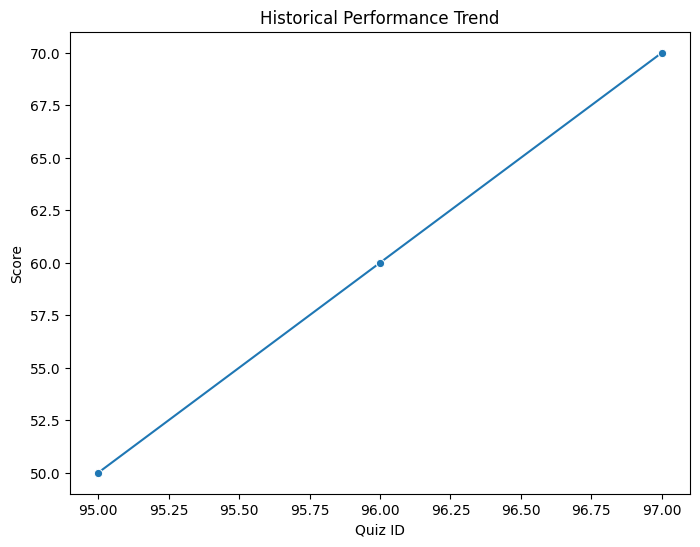

In [ ]:
def main():
    current_quiz, historical_quiz = simulate_data()
    insights = analyze_data(current_quiz, historical_quiz)
    recommendations = generate_recommendations(insights)
    print("=== Personalized Insights ===")
    print(insights["topic_performance"])
    print("\n=== Recommendations ===")
    for rec in recommendations:
        print(f"- {rec}")
    plot_insights(insights)
if __name__ == "__main__":
    main()
